# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 


In [28]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [10]:
X.sample(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
49,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
51,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0


In [7]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
X.shape

(178, 13)

In [25]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [15]:
print('Empty cells in data')
print(X.isnull().sum())

Empty cells in data
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


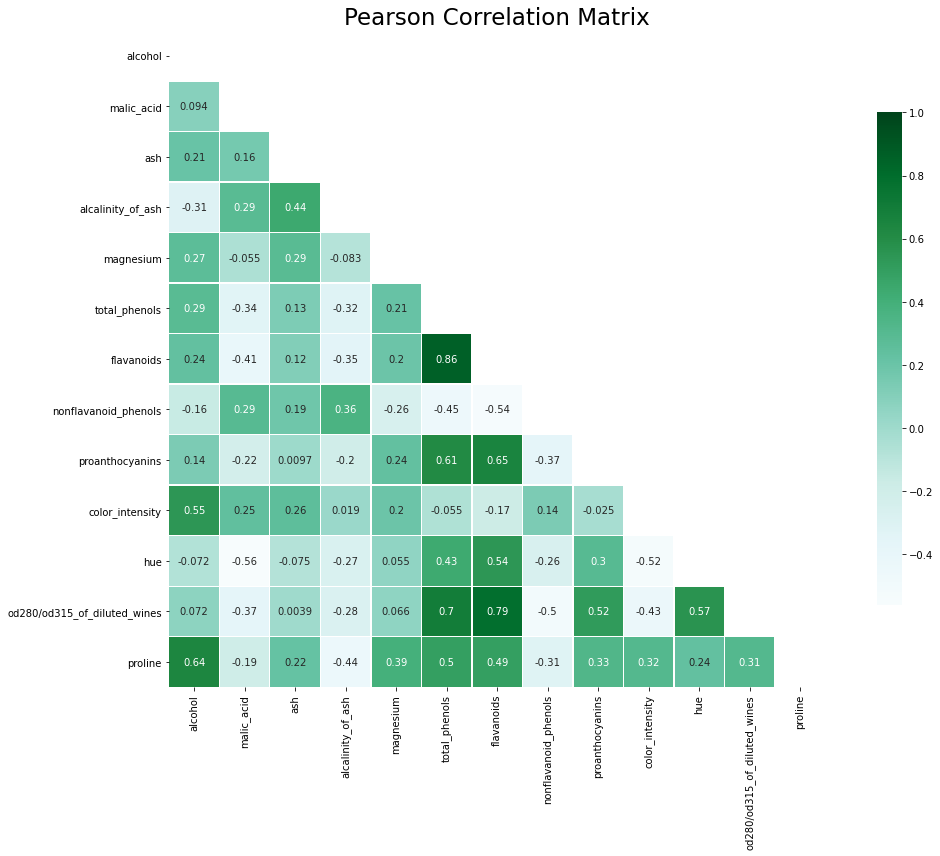

In [21]:
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=23)

sns.heatmap(X.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()


In [32]:
for k, v in X.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(X)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column alcohol outliers = 0.00%
Column malic_acid outliers = 1.69%
Column ash outliers = 1.69%
Column alcalinity_of_ash outliers = 2.25%
Column magnesium outliers = 2.25%
Column total_phenols outliers = 0.00%
Column flavanoids outliers = 0.00%
Column nonflavanoid_phenols outliers = 0.00%
Column proanthocyanins outliers = 1.12%
Column color_intensity outliers = 2.25%
Column hue outliers = 0.56%
Column od280/od315_of_diluted_wines outliers = 0.00%
Column proline outliers = 0.00%


In [ ]:
# most correlating columns
features = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [ ]:
""""
K Means Clustering tries to cluster your data 
into clusters based on their similarity. 
In this algorithm, we have to specify the number of clusters 
(which is a hyperparameter) we want the data to be grouped into. 
Hyperparameters are the variables whose value need to be set before 
applying value to the dataset.
Hyperparameters are adjustable parameters 
you choose to train a model that carries out the training process itself.
"""

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [85]:
# Scaling the Data 
wine_data = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=8)
kmeans.fit(wine_data)
y_kmeans = kmeans.predict(wine_data)

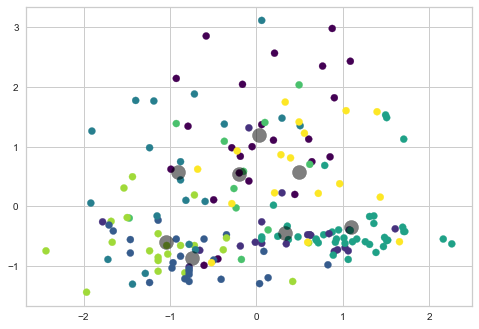

In [83]:
plt.scatter(wine_data[:, 0], wine_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [86]:
from sklearn.metrics import silhouette_score 
pred = kmeans.fit_predict(wine_data)
centers = kmeans.cluster_centers_

In [87]:
from yellowbrick.cluster.elbow import KElbowVisualizer

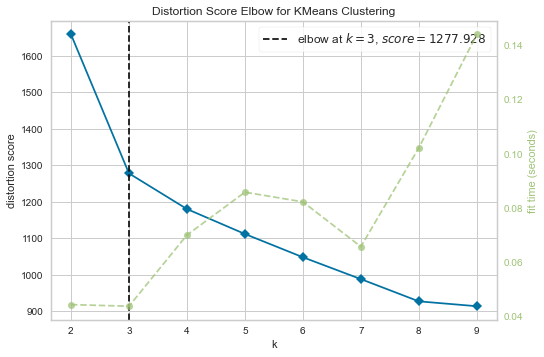

In [88]:
model = kmeans
visualizer = KElbowVisualizer(model, k=(2,10)) #Evaluation of the usupervised learinng - Read. 
visualizer.fit(wine_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [89]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(wine_data)
y_kmeans = kmeans.predict(wine_data)

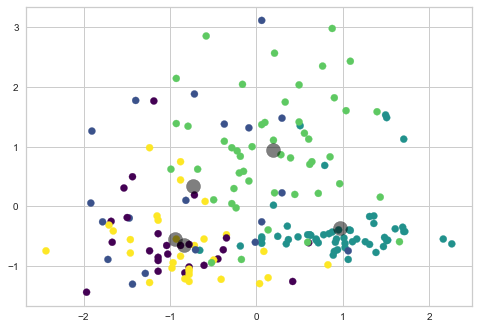

In [90]:
plt.scatter(wine_data[:, 0], wine_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

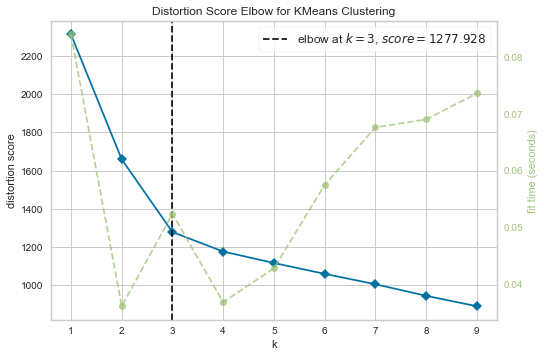

In [96]:
model = kmeans
visualizer = KElbowVisualizer(model, k=(1,10)) #Evaluation of the usupervised learinng - Read. 
visualizer.fit(wine_data)        # Fit the data to the visualizer
visualizer.show() 

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [91]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_data)
y_kmeans = kmeans.predict(wine_data)

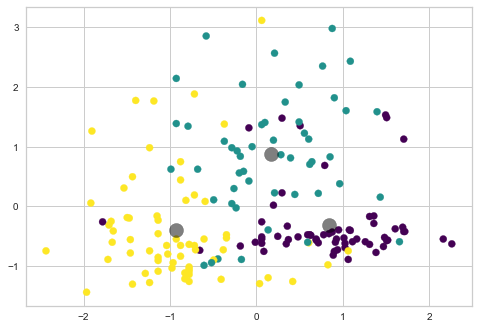

In [92]:
plt.scatter(wine_data[:, 0], wine_data[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

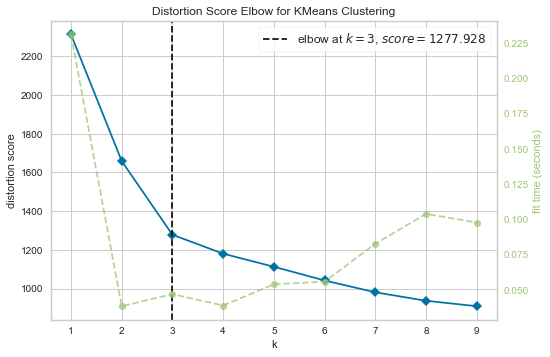

In [95]:
model = kmeans
visualizer = KElbowVisualizer(model, k=(1,10)) #Evaluation of the usupervised learinng - Read. 
visualizer.fit(wine_data)        # Fit the data to the visualizer
visualizer.show() 

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [ ]:
""""
By default, the scoring parameter metric is set to distortion, 
which computes the sum of squared distances from each point to its assigned center. 
However, two other metrics can also be used with the KElbowVisualizer—silhouette and calinski_harabaz. 
The silhouette score is the mean silhouette coefficient for all samples, while the calinski_harabaz 
score computes the ratio of dispersion between and within clusters.
"""

In [108]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import pairwise_distances

from yellowbrick.utils import KneeLocator
from yellowbrick.style.palettes import LINE_COLOR
from yellowbrick.cluster.base import ClusteringScoreVisualizer
from yellowbrick.exceptions import YellowbrickValueError, YellowbrickWarning

try:
    from sklearn.metrics import calinski_harabasz_score as chs
except ImportError:
    from sklearn.metrics import calinski_harabaz_score as chs


In [112]:
model = KMeans(n_clusters=3)
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette_score', timings=False)
visualizer.fit(wine_data)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

YellowbrickValueError: '{}' is not a defined metric use one of distortion, silhouette, or calinski_harabasz

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.